__Source__ :https://www.kaggle.com/blastchar/telco-customer-churn

Why we not need to standarization or normalize : https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

Feature Scaling Mater : https://www.youtube.com/watch?v=goMoUHl8q6c

### Column Description
- __customerID:__ Customer ID
- __gender:__ Whether the customer is a male or a female
- __SeniorCitizen:__ Whether the customer is a senior citizen or not (1, 0)
- __Partner:__ Whether the customer has a partner or not (Yes, No)
- __Dependents:__ Whether the customer has dependents or not (Yes, No)
- __tenure:__ Number of months the customer has stayed with the company
- __PhoneService:__ Whether the customer has a phone service or not (Yes, No)
- __MultipleLines:__ Whether the customer has multiple lines or not (Yes, No, No phone service)
- __InternetService:__ Customer’s internet service provider (DSL, Fiber optic, No)
- __OnlineSecurity:__ Whether the customer has online security or not (Yes, No, No internet service)
- __OnlineBackup:__ Whether the customer has online backup or not (Yes, No, No internet service)
- __DeviceProtection:__ Whether the customer has device protection or not (Yes, No, No internet service)
- __TechSupport:__ Whether the customer has tech support or not (Yes, No, No internet service)
- __StreamingTV:__ Whether the customer has streaming TV or not (Yes, No, No internet service)
- __StreamingMovies:__ Whether the customer has streaming movies or not (Yes, No, No internet service)
- __Contract:__ The contract term of the customer (Month-to-month, One year, Two year)
- __PaperlessBilling:__ Whether the customer has paperless billing or not (Yes, No)
- __PaymentMethod:__ The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- __MonthlyCharges:__ The amount charged to the customer monthly
- __TotalCharges:__ The total amount charged to the customer
- __Churn:__ Whether the customer churned or not (Yes or No)

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [3]:
pd.set_option("display.max_columns", 22)
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Cleaning

In [6]:
#Replacing spaces with null values in total charges column and drop them
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)
telcom = telcom.dropna()
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

## Data Manipulation

In [9]:
pd.set_option("display.max_columns", 40)
bin_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
var_dummy = ['gender','MultipleLines','InternetService','Contract','PaymentMethod','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
std_cols = ['tenure','MonthlyCharges','TotalCharges']

## Label Encoder for binary columns
label = LabelEncoder()
for i in bin_cols:
    telcom[i] = label.fit_transform(telcom[i])

## Label encoder for multiple value category
telcom = pd.get_dummies(data=telcom, columns = var_dummy)

## Standard Scaler
telcom2 = telcom.copy()
scalera = StandardScaler()
scalerb = StandardScaler()
scalerc = StandardScaler()
scaleda = scalera.fit_transform(telcom[['tenure']])
scaledb = scalerb.fit_transform(telcom[['MonthlyCharges']])
scaledc = scalerc.fit_transform(telcom[['TotalCharges']])
scaleda = pd.DataFrame(scaleda,columns=['tenure'])
scaledb = pd.DataFrame(scaledb,columns=['MonthlyCharges'])
scaledc = pd.DataFrame(scaledc,columns=['TotalCharges'])

telcom = telcom.drop(columns=std_cols,axis=1)
telcom = pd.concat([telcom,scaleda,scaledb,scaledc],axis=1)

telcom.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,-1.239504,0.196178,-0.940457


## Balancing Data (Under Sample)

In [12]:
telcom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [13]:
X = telcom.drop(columns=['customerID','Churn'])
Y = telcom['Churn']

In [14]:
nm =  NearMiss()
X_res,Y_res=nm.fit_sample(X,Y)
telco = pd.concat([X_res,Y_res],axis=1)
telco['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

# Classification Model

In [28]:
## train test split
pd.set_option("display.max_columns", 33)
#splitting train and test data 
feature    = telco.drop(columns=['Churn'])
target = telco['Churn']
train_X,test_X,train_Y,test_Y = train_test_split(feature,target,test_size = .25,random_state=123)
feature.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', '

In [29]:
### Logistic Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
dct = DecisionTreeClassifier()
dct.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
knn = KNeighborsClassifier(n_neighbors=73)
knn.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=73, p=2,
                     weights='uniform')

In [33]:
svc = SVC(probability=True)
svc.fit(train_X,train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
log_cv = cross_val_score(lr,train_X,train_Y,cv=5)*100
dct_cv = cross_val_score(dct,train_X,train_Y,cv=5)*100
rf_cv = cross_val_score(rf,train_X,train_Y,cv=5)*100
knn_cv = cross_val_score(knn,train_X,train_Y,cv=5)*100
svc_cv = cross_val_score(svc,train_X,train_Y,cv=5)*100

In [35]:
print(f'Logistic Regression : {log_cv.mean()}')
print(f'Decision Tree : {dct_cv.mean()}')
print(f'Random Forest : {rf_cv.mean()}')
print(f'KNN : {knn_cv.mean()}')
print(f'SVC : {svc_cv.mean()}')

Logistic Regression : 67.39279348102878
Decision Tree : 61.43353705118411
Random Forest : 66.39317545199899
KNN : 69.0693913929208
SVC : 69.81888209829387


In [36]:
pred_lr = lr.predict(test_X)
pred_dt = dct.predict(test_X)
pred_rf = rf.predict(test_X)
pred_knn = knn.predict(test_X)
pred_svc = svc.predict(test_X)

print('Logistic Regressin\n',classification_report(test_Y,pred_lr))
print('\n\nDecision Tree\n',classification_report(test_Y,pred_dt))
print('\n\nRandom Forest\n',classification_report(test_Y,pred_rf))
print('\n\nKNN\n',classification_report(test_Y,pred_knn))
print('\n\nSVC\n',classification_report(test_Y,pred_svc))

Logistic Regressin
               precision    recall  f1-score   support

           0       0.75      0.52      0.61       479
           1       0.62      0.82      0.70       456

    accuracy                           0.67       935
   macro avg       0.68      0.67      0.66       935
weighted avg       0.69      0.67      0.66       935



Decision Tree
               precision    recall  f1-score   support

           0       0.63      0.60      0.61       479
           1       0.60      0.63      0.61       456

    accuracy                           0.61       935
   macro avg       0.61      0.61      0.61       935
weighted avg       0.61      0.61      0.61       935



Random Forest
               precision    recall  f1-score   support

           0       0.70      0.63      0.66       479
           1       0.65      0.71      0.68       456

    accuracy                           0.67       935
   macro avg       0.67      0.67      0.67       935
weighted avg       0

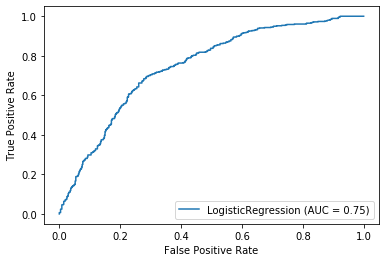

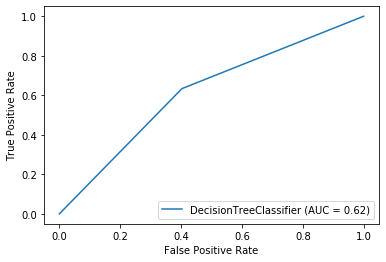

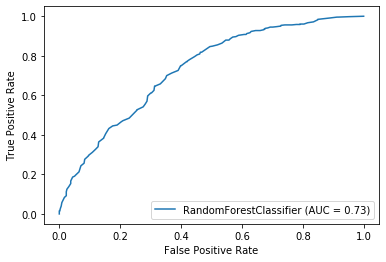

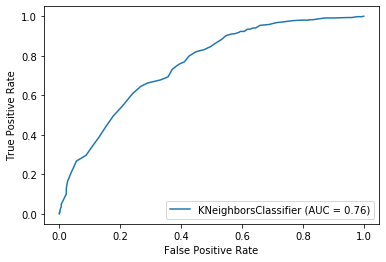

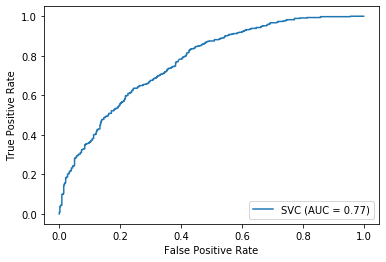

In [37]:
plot_roc_curve(lr,test_X,test_Y)
plot_roc_curve(dct,test_X,test_Y)
plot_roc_curve(rf,test_X,test_Y)
plot_roc_curve(knn,test_X,test_Y)
plot_roc_curve(svc,test_X,test_Y)

## Hyperparameter Tuning

__Parameter Tuning Logistic Regression__

In [38]:
def tuning(model,parameter,n_cv):
    random = RandomizedSearchCV(model, parameter, cv = n_cv)
    random.fit(train_X,train_Y)
    best_param = random.best_params_
    
    return best_param

In [39]:
log_param = {
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'penalty':['none','l1','l2','elasticnet','none'],
    'C':[100,10,1.0,0.1,0.01],
    'class_weight': ['balanced','none'],
    'max_iter' : [10,100,1000],
    'multi_class' : ['auto','ovr','multinomial']
}

log_best = tuning(lr,log_param,5)
log_best

C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'none'

  FitFailedWarning)
C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'none'

  FitFailedWarning)
C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'none'

  FitFailedWarning)
C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_s

{'solver': 'saga',
 'penalty': 'none',
 'multi_class': 'auto',
 'max_iter': 100,
 'class_weight': 'none',
 'C': 0.1}

In [40]:
lr_new = LogisticRegression(solver='saga',penalty='none',C=0.1,multi_class='auto',max_iter=100,class_weight='none')
lr_new.fit(train_X,train_Y)

C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.1, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regressin
               precision    recall  f1-score   support

           0       0.75      0.52      0.62       479
           1       0.62      0.82      0.71       456

    accuracy                           0.67       935
   macro avg       0.69      0.67      0.66       935
weighted avg       0.69      0.67      0.66       935



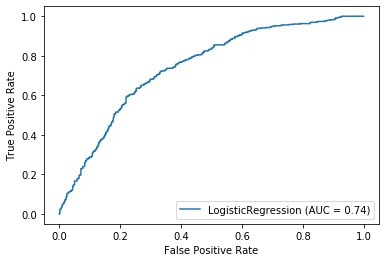

In [41]:
pred_lrnew = lr_new.predict(test_X)

print('Logistic Regressin\n',classification_report(test_Y,pred_lrnew))
plot_roc_curve(lr_new,test_X,test_Y)

__Parameter Tuning Decision Tree__

In [42]:
dct_new = DecisionTreeClassifier()

param = {
    'max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'criterion':['gini','entropy']
}

log_best = tuning(dct_new,param,5)
log_best

{'max_depth': 10, 'criterion': 'gini'}

In [43]:
dct_new = DecisionTreeClassifier(max_depth= 10, criterion='gini')
dct_new.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Decision Tree
               precision    recall  f1-score   support

           0       0.67      0.56      0.61       479
           1       0.61      0.72      0.66       456

    accuracy                           0.64       935
   macro avg       0.64      0.64      0.63       935
weighted avg       0.64      0.64      0.63       935



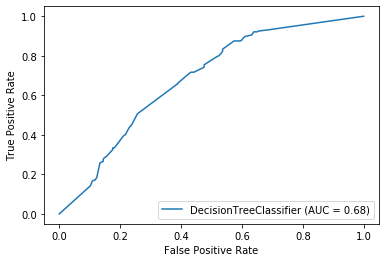

In [44]:
pred_dct_new = dct_new.predict(test_X)

print('Decision Tree\n',classification_report(test_Y,pred_dct_new))
plot_roc_curve(dct_new,test_X,test_Y)

__Parameter Tuning Random Forest__

In [45]:
rnd = RandomForestClassifier()

param = {
    'n_estimators': [10,100,1000],
    'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'criterion':['gini','entropy']
}

log_best = tuning(rnd,param,5)
log_best

{'n_estimators': 10, 'max_depth': 10, 'criterion': 'gini'}

In [46]:
rnd_new = RandomForestClassifier(n_estimators = 10,max_depth = 10,criterion='gini')
rnd_new.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Random Forest
               precision    recall  f1-score   support

           0       0.73      0.57      0.64       479
           1       0.63      0.78      0.70       456

    accuracy                           0.67       935
   macro avg       0.68      0.68      0.67       935
weighted avg       0.68      0.67      0.67       935



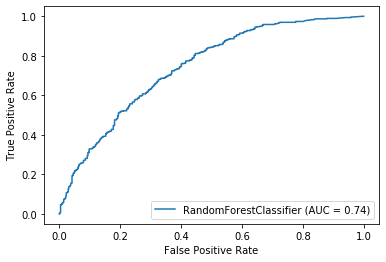

In [47]:
pred_rnd_new = rnd_new.predict(test_X)

print('Random Forest\n',classification_report(test_Y,pred_rnd_new))
plot_roc_curve(rnd_new,test_X,test_Y)

__Parameter Tuning KNN__

In [48]:
knn = KNeighborsClassifier()

log_param = {
        'n_neighbors' : list(range(50,100)),
        'weights':['uniform','distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size':list(range(1,100)),
        'p':[1,2]
}

log_best = tuning(knn,log_param,5)
log_best

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 75,
 'leaf_size': 30,
 'algorithm': 'brute'}

In [49]:
knn_new = KNeighborsClassifier(weights='uniform',p=2,n_neighbors=75,leaf_size=30,algorithm='brute')
knn_new.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=75, p=2,
                     weights='uniform')

KNN
               precision    recall  f1-score   support

           0       0.73      0.59      0.65       479
           1       0.64      0.77      0.70       456

    accuracy                           0.68       935
   macro avg       0.69      0.68      0.68       935
weighted avg       0.69      0.68      0.68       935



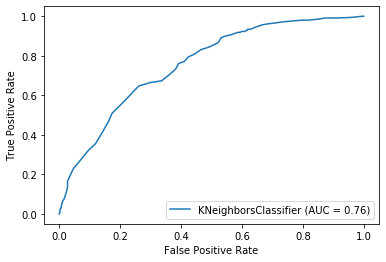

In [50]:
pred_knn_new = knn_new.predict(test_X)

print('KNN\n',classification_report(test_Y,pred_knn_new))
plot_roc_curve(knn_new,test_X,test_Y)

__Parameter Tuning SVC__

In [51]:
svc_new = SVC()

param = { 
        'decision_function_shape':['ovr','ovo'],
         'class_weight': ['balanced','None'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'probability' : [False,True]}

def tuning(model,parameter,n_cv):
    random = RandomizedSearchCV(model, parameter, cv = n_cv)
    random.fit(train_X,train_Y)
    best_param = random.best_params_
    
    return best_param

log_best = tuning(svc_new,param,5)
log_best

C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_s

C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\Asus\Anaconda3_New\lib\site-packages\sklearn\model_s

{'probability': True,
 'decision_function_shape': 'ovo',
 'class_weight': 'balanced',
 'C': 1}

In [52]:
svc_new = SVC(probability=True,C=1,class_weight='balanced',decision_function_shape='ovo')
svc_new.fit(train_X,train_Y)

SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVC
               precision    recall  f1-score   support

           0       0.78      0.57      0.66       479
           1       0.65      0.83      0.73       456

    accuracy                           0.70       935
   macro avg       0.71      0.70      0.69       935
weighted avg       0.71      0.70      0.69       935



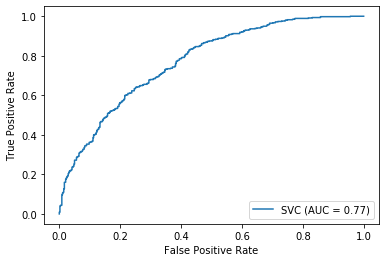

In [53]:
pred_svc_new = svc_new.predict(test_X)

print('SVC\n',classification_report(test_Y,pred_svc_new))
plot_roc_curve(svc_new,test_X,test_Y)